In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_selection import SelectFromModel, SelectPercentile
from sklearn.metrics import f1_score, confusion_matrix

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [2]:
# creat a dataframe and read the file
df = pd.read_csv('/content/hotel_bookings 2.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [3]:
# check the tail
df. tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [4]:
# check data type, columns and rows
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Data transformation and data engineering/data wrangling**

In [5]:
# get rid of company because its around 90 % null values
df = df.drop('company', axis=1)

In [6]:
# combine babie and childern
df['children'] = df['babies'] + df['children']

In [7]:
# statisitic on numerical columns
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.111839,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.412567,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,5400.000000,8.000000,5.000000


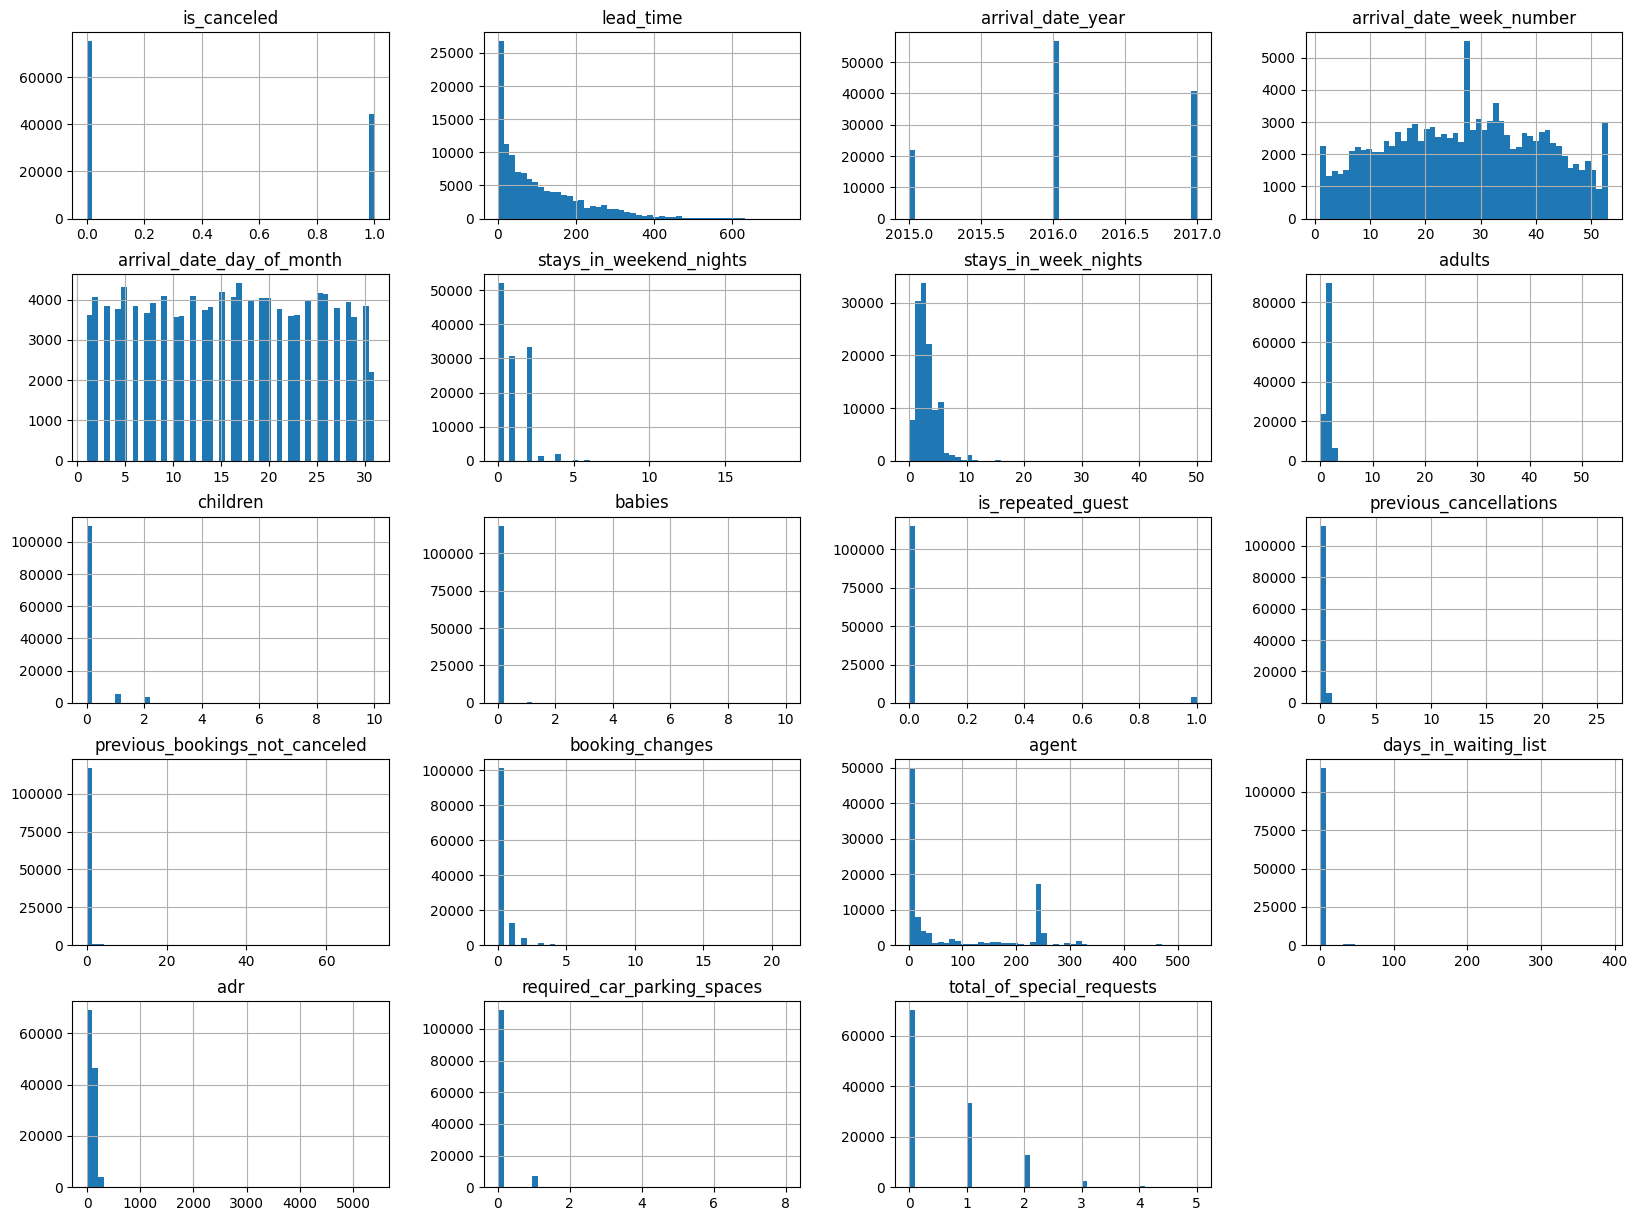

In [8]:
# distibution of numerical columns
df.hist(bins=50, figsize=(20,15))
plt.show()

<Axes: xlabel='agent'>

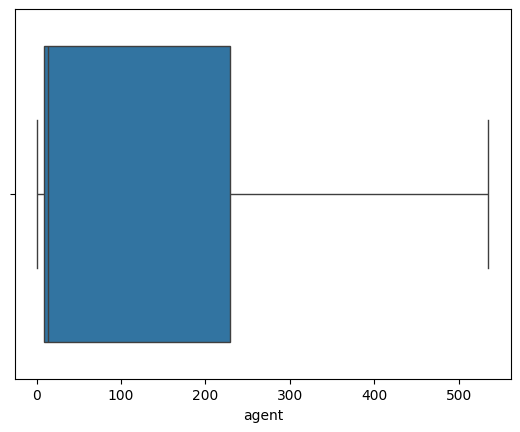

In [9]:
# box plot on agent to see
sns.boxplot(x=df['agent'])

In [10]:
# Because of right skew using the mediam to replace nulls in agent.
# Since there is a low amount of nulls the result of replacing nulls wouldnt be too significant of a change.
df['agent'] = df['agent'].fillna(df['agent'].median())

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 31 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [12]:
# stats on the non categorical columns
df.describe(include=['O'])

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21/10/2015
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [13]:
# drop babies
df = df.drop('babies', axis=1)


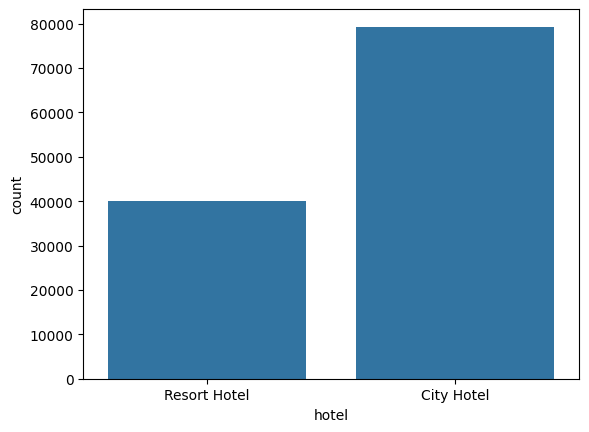

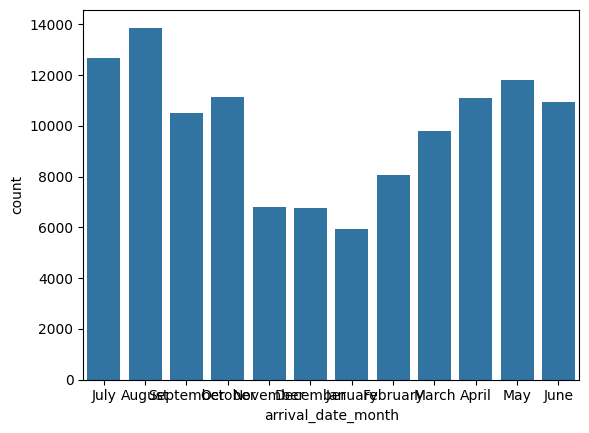

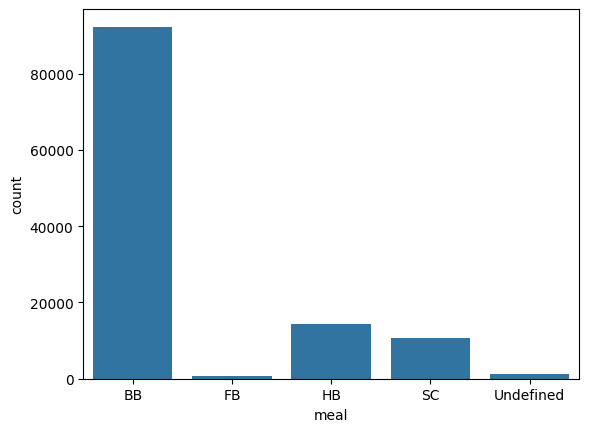

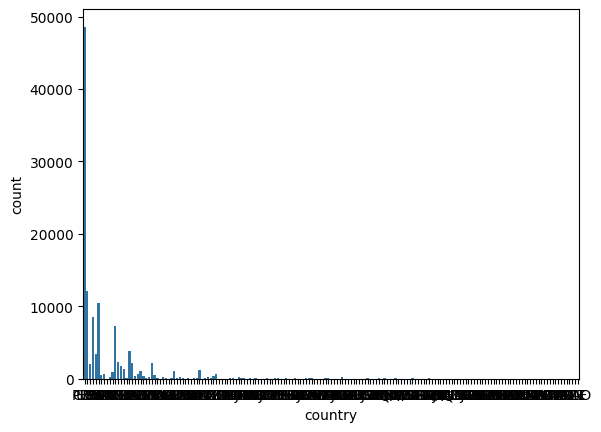

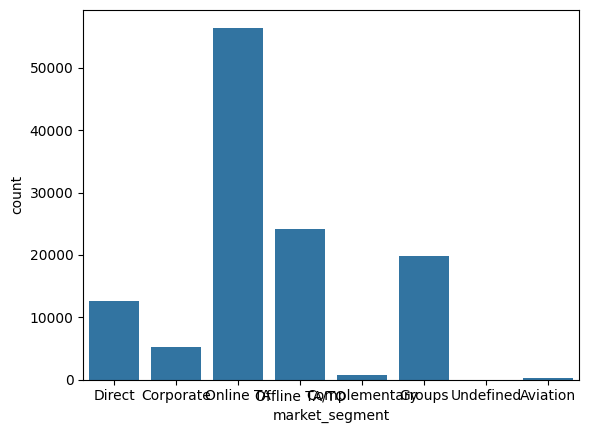

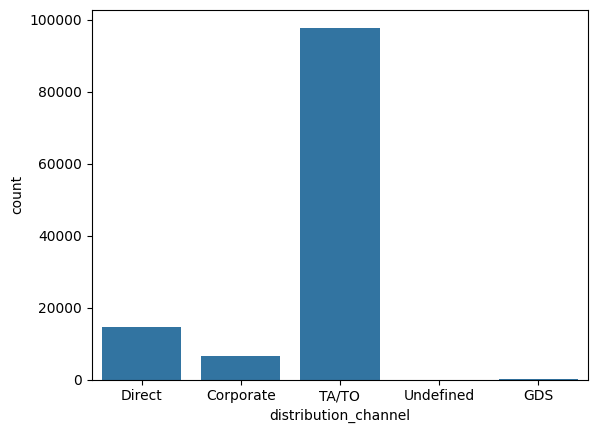

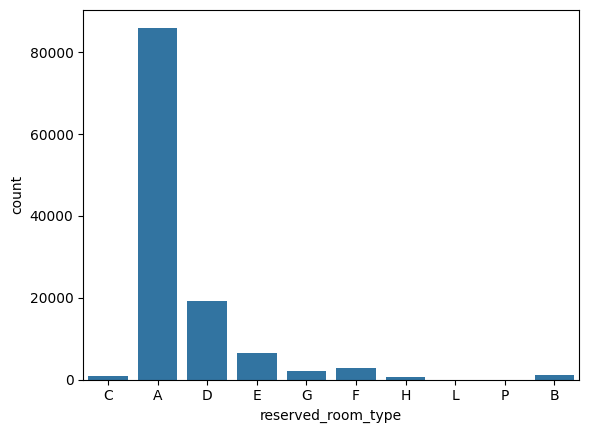

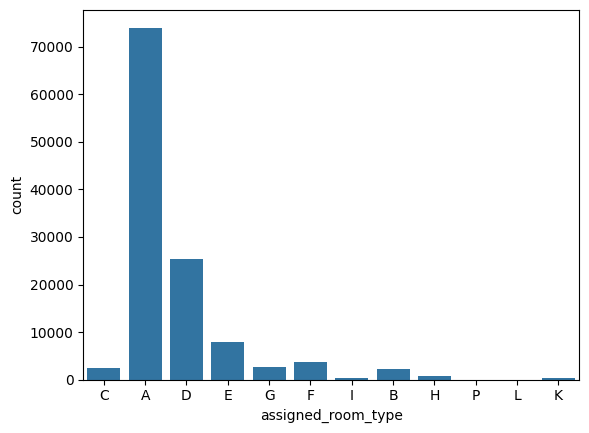

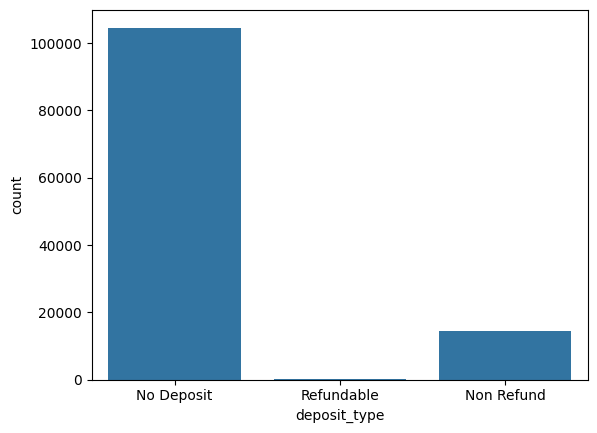

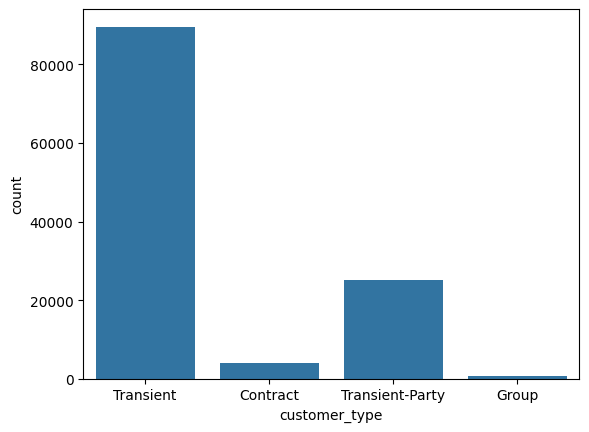

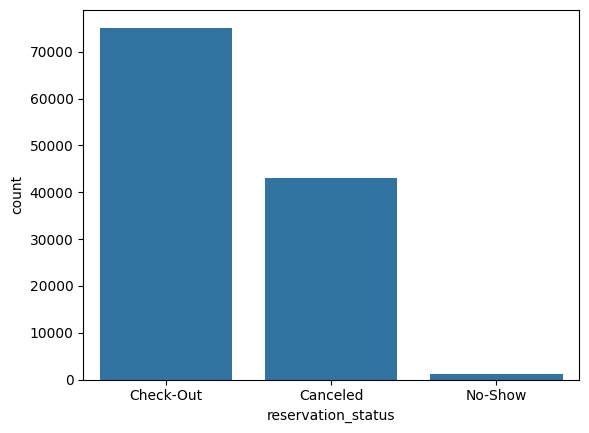

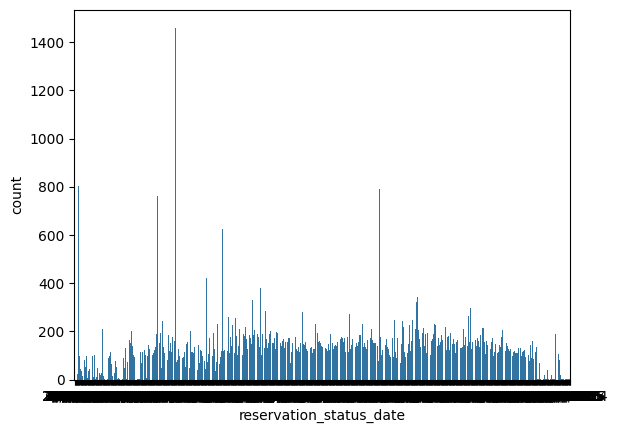

In [14]:
# count plot for all categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        sns.countplot(x=df[col])
        plt.show()

In [15]:
# Cancellation rate by hotel type
cancellation_by_hotel = df.groupby('hotel')['is_canceled'].mean()
print("Cancellation Rate by Hotel Type:")
print(cancellation_by_hotel)

Cancellation Rate by Hotel Type:
hotel
City Hotel      0.417270
Resort Hotel    0.277634
Name: is_canceled, dtype: float64


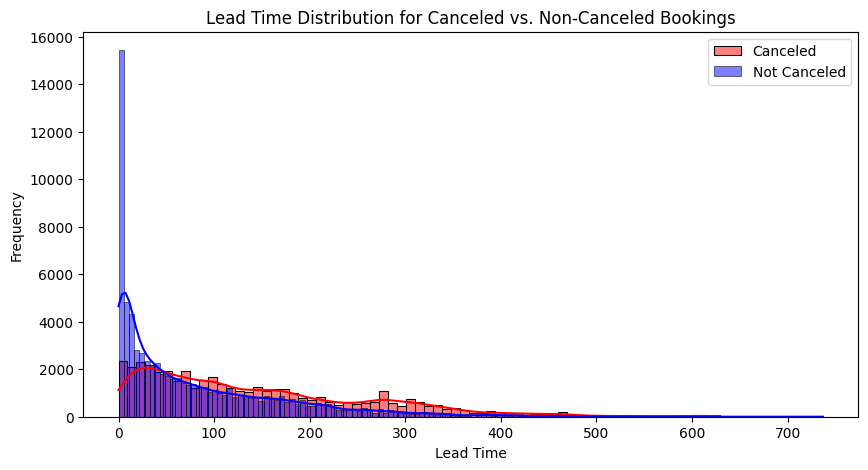

In [16]:
# Distribution of lead times for canceled vs. non-canceled bookings
plt.figure(figsize=(10, 5))
sns.histplot(df[df['is_canceled'] == 1]['lead_time'], color='red', kde=True, label='Canceled')
sns.histplot(df[df['is_canceled'] == 0]['lead_time'], color='blue', kde=True, label='Not Canceled')
plt.legend()
plt.title('Lead Time Distribution for Canceled vs. Non-Canceled Bookings')
plt.xlabel('Lead Time')
plt.ylabel('Frequency')
plt.show()

**Insights**

Short Lead Times: Bookings made close to the arrival date have a high frequency and lower cancellation rates.

Long Lead Times: Bookings made well in advance have higher cancellation rates.

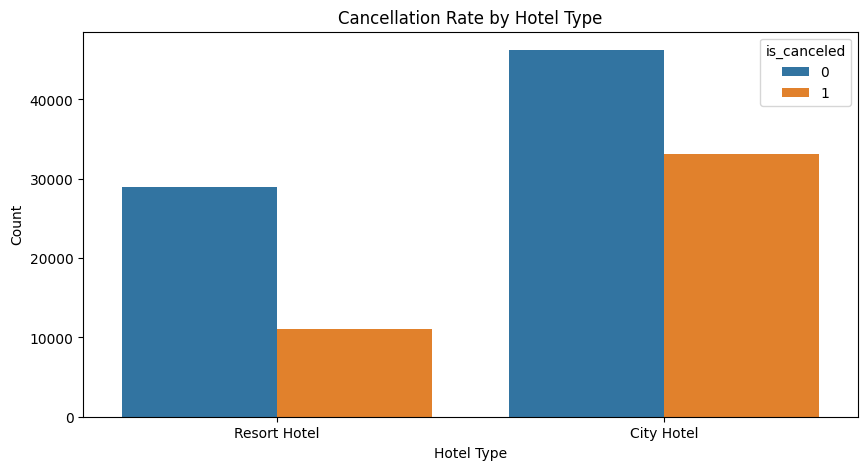

In [17]:
# 1. Cancellation Rate by Hotel Type
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.title('Cancellation Rate by Hotel Type')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.show()

**Insights**

Cancelations





In [18]:
# replace udefined with the mode
df['meal'] = df['meal'].replace('Undefined', df['meal'].mode()[0])

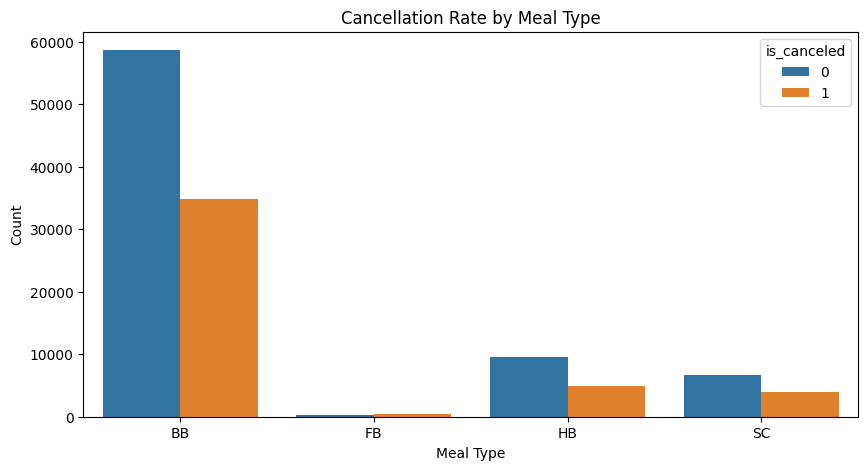

In [19]:
# 2. Cancellation Rate by Meal Type
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='meal', hue='is_canceled')
plt.title('Cancellation Rate by Meal Type')
plt.xlabel('Meal Type')
plt.ylabel('Count')
plt.show()

**Insights**
BB (Bed & Breakfast): The BB meal type has the highest number of bookings, both canceled and non-canceled, with a significant number of cancellations.

HB (Half Board) and SC (Self Catering): These meal types have a relatively balanced distribution between canceled and non-canceled bookings, indicating moderate cancellation rates.

FB (Full Board): The FB meal type has the fewest bookings and cancellations, suggesting it is less popular among customers.  Could look at getting rid of Full Board since not many customers select it.

In [20]:
# replace undefined with the mode
df['market_segment'] = df['market_segment'].replace('Undefined', df['market_segment'].mode()[0])

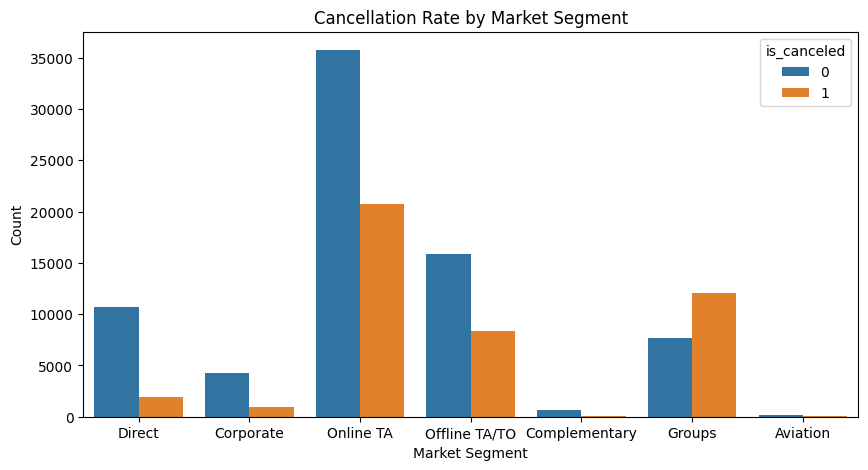

In [21]:
# 3. Cancellation Rate by Market Segment
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='market_segment', hue='is_canceled')
plt.title('Cancellation Rate by Market Segment')
plt.xlabel('Market Segment')
plt.ylabel('Count')
plt.show()

**Insights**

Online TA: The Online Travel Agency segment has the highest number of both bookings and cancellations, indicating a high cancellation rate.

Groups: Group bookings show a higher proportion of cancellations compared to non-cancellations, suggesting they are more prone to cancellation.

Direct and Offline TA/TO: These segments have relatively balanced distributions between canceled and non-canceled bookings, indicating moderate cancellation rates

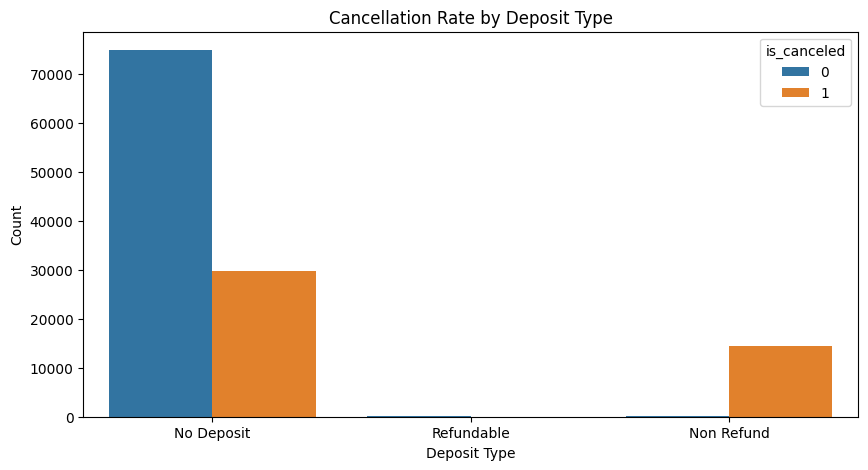

In [22]:
# 4. Cancellation Rate by Deposit Type
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='deposit_type', hue='is_canceled')
plt.title('Cancellation Rate by Deposit Type')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.show()

**Insights**
No Deposit: Bookings with no deposit have the highest number of both bookings and cancellations, indicating that customers are more likely to cancel when no deposit is required. Direct booking as more resavation bookings in general, however, it also has a high number of cancelations .  Might want to look at phasing out no deposit making customers pick refoundable despoit type in its place with an afforable deposit.

Non-Refundable: Non-refundable bookings have a significant number of cancellations, but the number is much lower compared to no deposit bookings, suggesting that non-refundable deposits reduce the likelihood of cancellation.

Refundable: There are very few refundable bookings and cancellations, indicating that this option is less commonly chosen by customers.

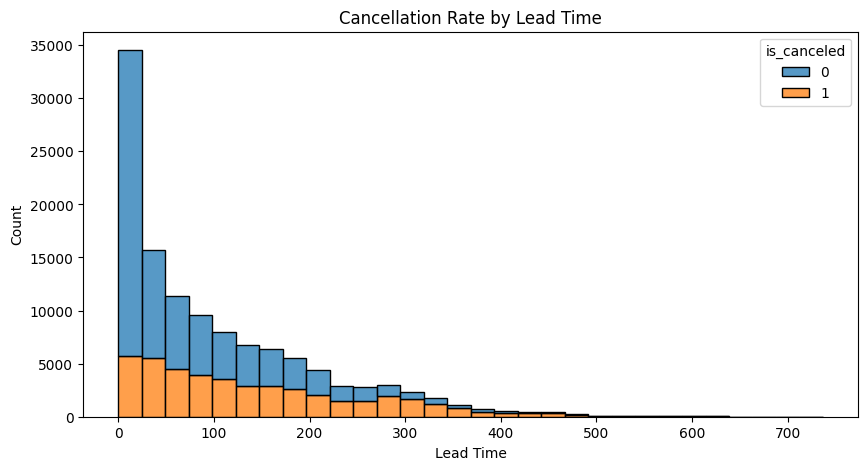

In [23]:
# 6. Cancellation Rate by Lead Time
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='lead_time', hue='is_canceled', multiple='stack', bins=30)
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time')
plt.ylabel('Count')
plt.show()

**Insights**

Short Lead Times: Bookings with short lead times (close to zero days) have the highest count and show a lower proportion of cancellations, indicating that bookings made closer to the arrival date are less likely to be canceled.

Increasing Cancellation Rate with Lead Time: As the lead time increases, the proportion of cancellations also increases, suggesting that bookings made well in advance are more prone to cancellation.

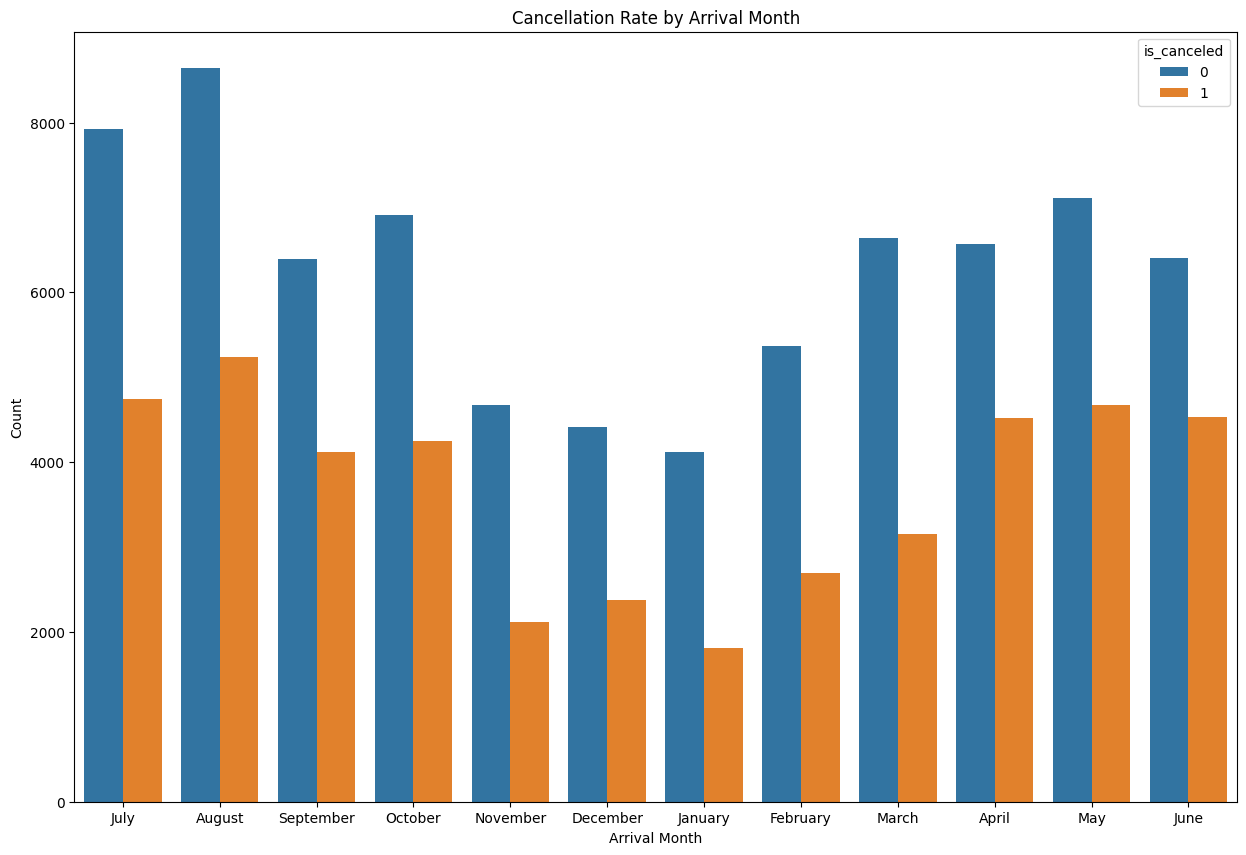

In [24]:
# 7. Cancellation Rate by Arrival Month
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='arrival_date_month', hue='is_canceled')
plt.title('Cancellation Rate by Arrival Month')
plt.xlabel('Arrival Month')
plt.ylabel('Count')
plt.show()

**Insights**

Higher Cancellations in Peak Months: July and August have the highest counts of both bookings and cancellations, indicating these peak months have higher demand and also higher cancellation rates.

Lower Cancellations in Off-Peak Months: November, January, and February show lower counts of both bookings and cancellations, suggesting lower demand and fewer cancellations during these off-peak months.

Consistent Patterns: The cancellation rates are relatively consistent across different months, with a noticeable trend of higher bookings leading to higher cancellations.

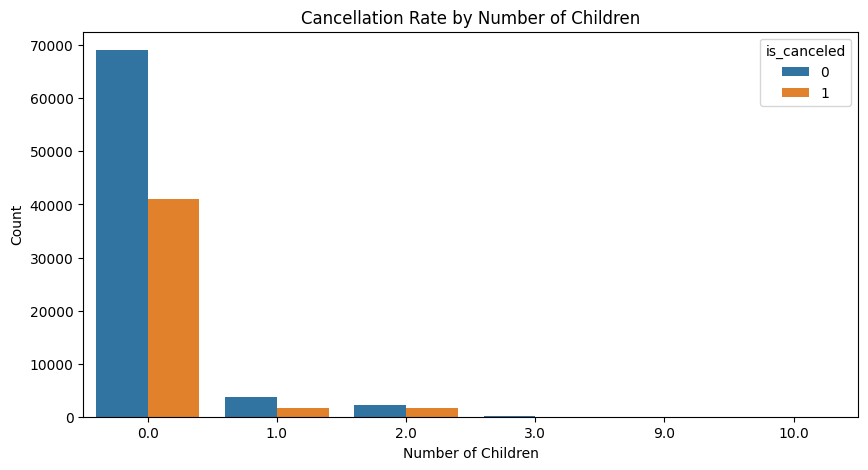

In [25]:
# prompt: count chart of childern and cancelations

plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='children', hue='is_canceled')
plt.title('Cancellation Rate by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Count')
plt.show()


No Children: The majority of bookings have no children, and there is a significant number of cancellations among these bookings.

One and Two Children: Bookings with one or two children have fewer total bookings, with a lower but notable proportion of cancellations.

Three or More Children: There are very few bookings with three or more children, and cancellations in these categories are minimal, indicating that families with more children are less likely to book or cancel.

In [26]:
# Calculate the total number of bookings with children
total_bookings_with_children = df[df['children'] > 0].shape[0]

# Calculate the number of cancellations with children
cancellations_with_children = df[(df['children'] > 0) & (df['is_canceled'] == 1)].shape[0]

# Calculate the percentage of cancellations with children
percentage_cancellations_with_children = (cancellations_with_children / total_bookings_with_children) * 100

percentage_cancellations_with_children

34.92284612087441

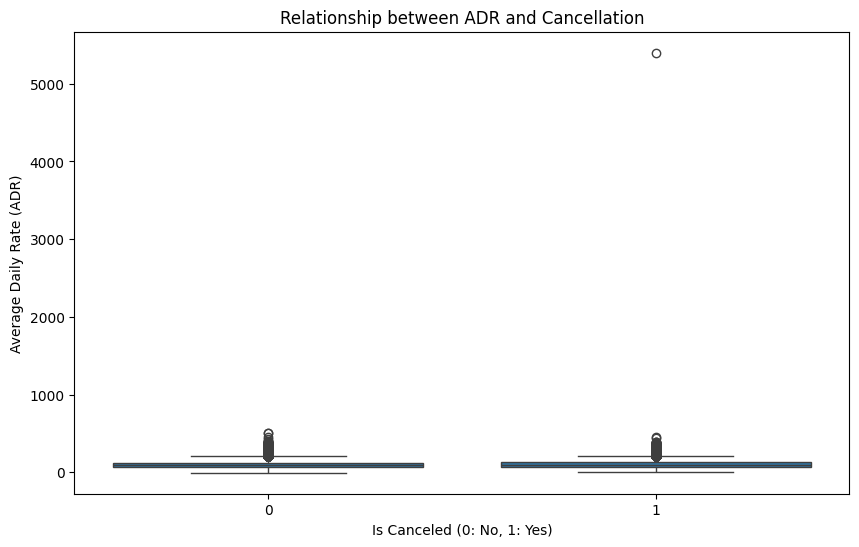

In [27]:
# prompt: want to chart the relatioship btween price and cancelations

# Relationship between ADR and Cancellation
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='is_canceled', y='adr')
plt.title('Relationship between ADR and Cancellation')
plt.xlabel('Is Canceled (0: No, 1: Yes)')
plt.ylabel('Average Daily Rate (ADR)')
plt.show()


**Insights**

Overall Distribution: The majority of Average Daily Rate (ADR) values for both canceled and non-canceled bookings are concentrated at lower ADR values.

Outliers: There are a few extreme outliers with very high ADR values, especially among non-canceled bookings.

Median ADR: The median ADR is slightly higher for canceled bookings compared to non-canceled bookings, indicating that bookings with higher ADRs may have a higher likelihood of being canceled.

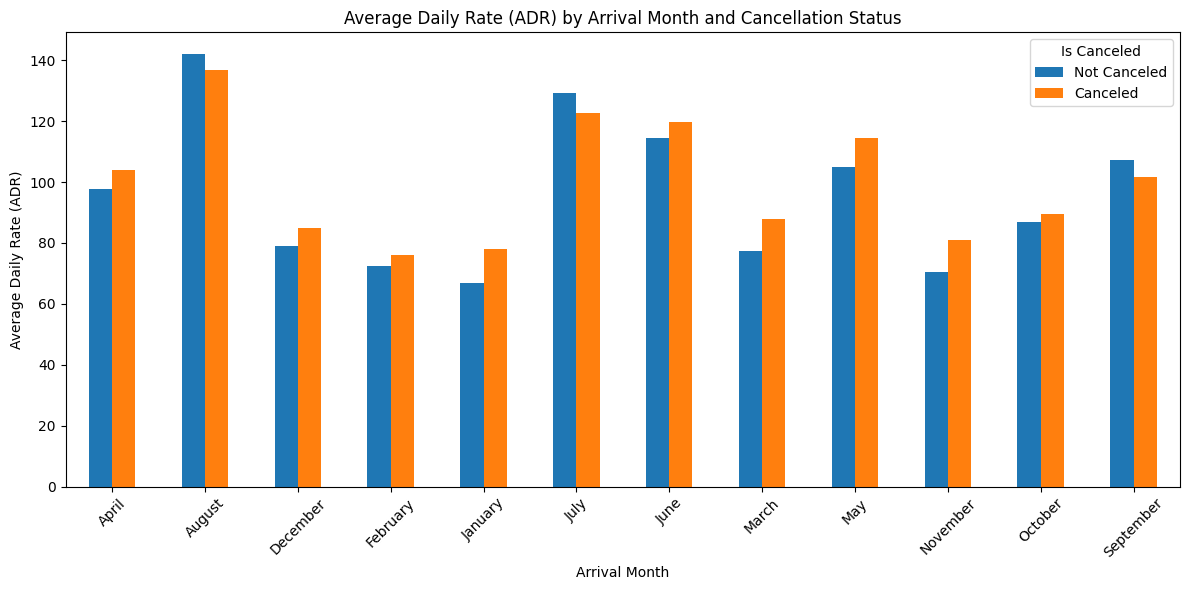

In [28]:
# prompt: chart for month and adr by canceles

# Group the data by arrival month and cancellation status, and calculate the average ADR for each group
adr_by_month_cancel = df.groupby(['arrival_date_month', 'is_canceled'])['adr'].mean().unstack()

# Plot the bar chart
adr_by_month_cancel.plot(kind='bar', figsize=(12, 6))
plt.title('Average Daily Rate (ADR) by Arrival Month and Cancellation Status')
plt.xlabel('Arrival Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(rotation=45)
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.tight_layout()
plt.show()


**Insights**

1. **Higher ADR in Peak Months**: August and July have the highest ADRs for both canceled and non-canceled bookings, indicating peak travel demand during these months.
2. **Consistent Pattern**: In most months, the ADR for canceled bookings is slightly higher or very similar to the ADR for non-canceled bookings, suggesting that higher ADRs might contribute to cancellations.
3. **Seasonal Variations**: There are noticeable seasonal variations in ADR, with lower ADRs observed in off-peak months like January, February, and November, and higher ADRs in peak months like April, July, and August.

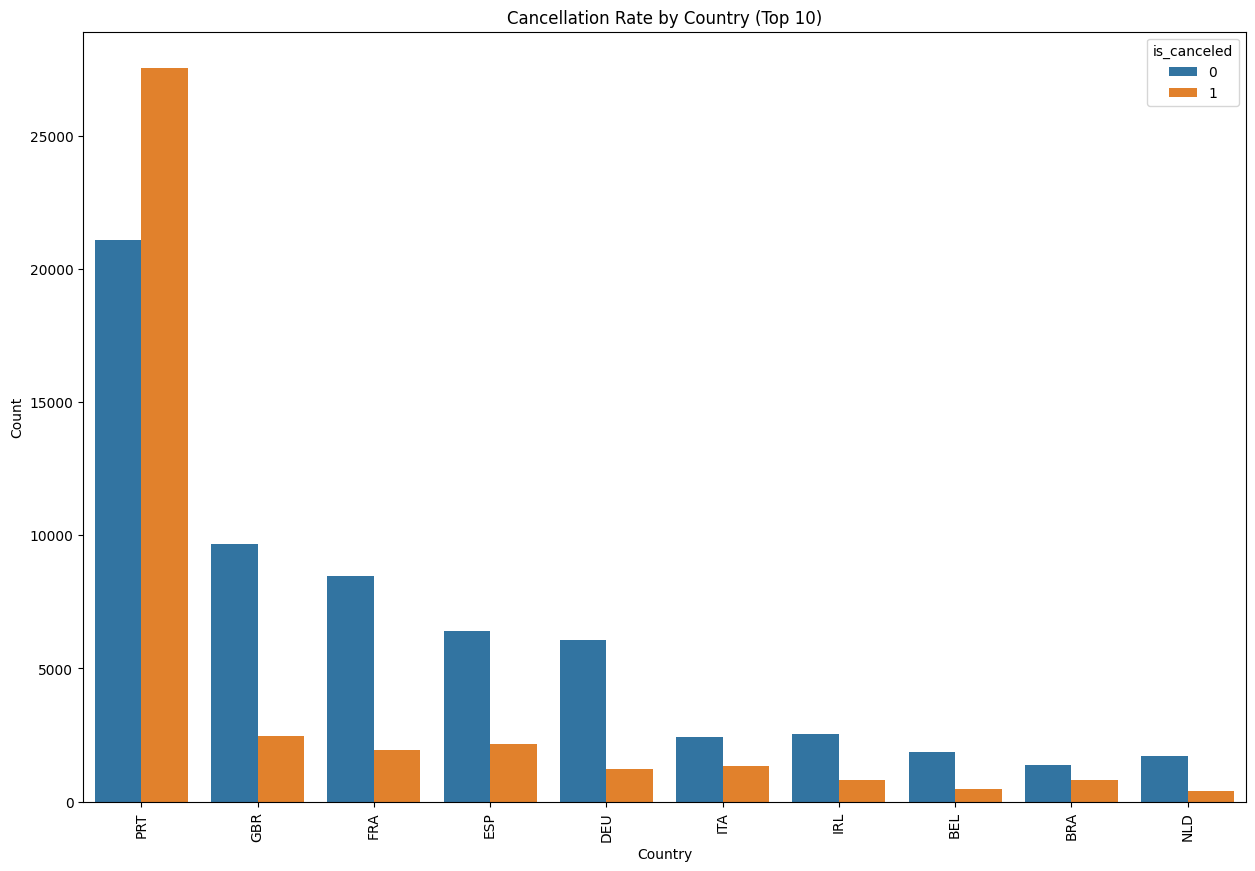

In [29]:
# prompt: country by cancelation chart

# 8. Cancellation Rate by Country
plt.figure(figsize=(15, 10))
sns.countplot(data=df, x='country', hue='is_canceled', order=df['country'].value_counts().iloc[:10].index)
plt.title('Cancellation Rate by Country (Top 10)')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()


In [30]:
# county distinct count
df['country'].nunique()

177

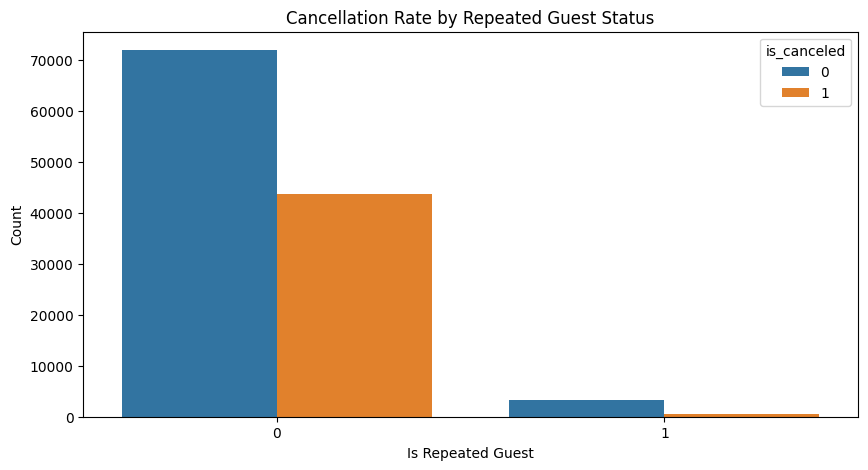

In [32]:
# Cancellation rate by repeated guest status
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='is_repeated_guest', hue='is_canceled')
plt.title('Cancellation Rate by Repeated Guest Status')
plt.xlabel('Is Repeated Guest')
plt.ylabel('Count')
plt.show()

**Insights**

First-Time Guests: The majority of first-time guests have a significant number of cancellations, indicating that new customers are more likely to cancel their bookings.

Repeated Guests: Repeated guests have a very low cancellation rate, suggesting that they are more reliable and less likely to cancel. Also, repeated guest booking reservations is very low compared to new quest.

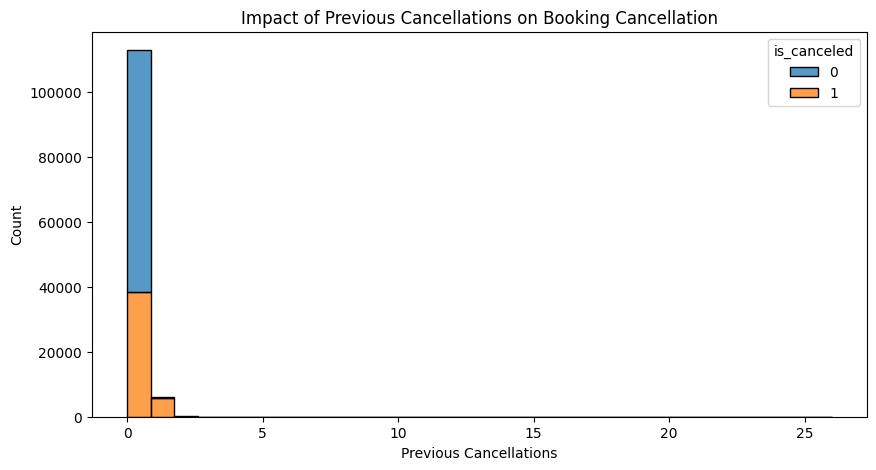

In [34]:
# Distribution of previous cancellations for canceled vs. non-canceled bookings
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='previous_cancellations', hue='is_canceled', multiple='stack', bins=30)
plt.title('Impact of Previous Cancellations on Booking Cancellation')
plt.xlabel('Previous Cancellations')
plt.ylabel('Count')
plt.show()

**Insights**
No Previous Cancellations: The vast majority of bookings have no previous cancellations, and a substantial portion of these are still canceled.

Higher Previous Cancellations: Customers with a higher number of previous cancellations tend to cancel more frequently, indicating a trend where past behavior predicts future cancellations.

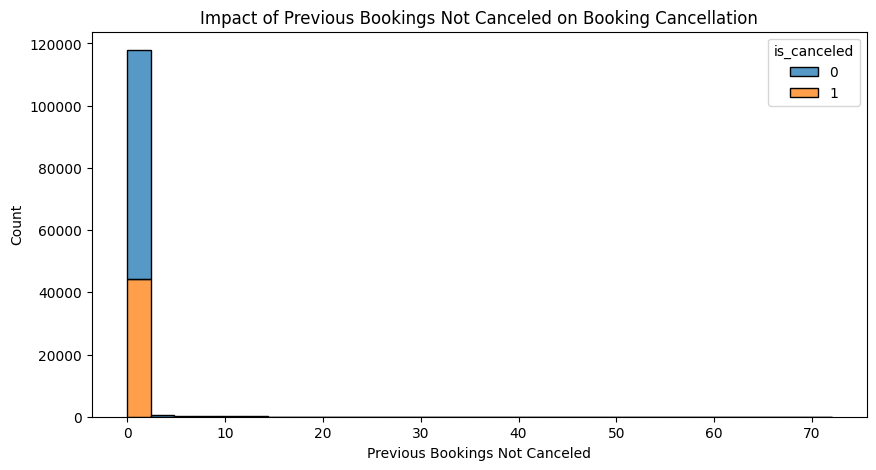

In [35]:
# Distribution of previous bookings not canceled for canceled vs. non-canceled bookings
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='previous_bookings_not_canceled', hue='is_canceled', multiple='stack', bins=30)
plt.title('Impact of Previous Bookings Not Canceled on Booking Cancellation')
plt.xlabel('Previous Bookings Not Canceled')
plt.ylabel('Count')
plt.show()

**Insights**

No Previous Bookings Not Canceled: The majority of bookings have no previous bookings that were not canceled, and these have a high number of cancellations.

Higher Previous Bookings Not Canceled: Customers with a history of many successful (not canceled) bookings show a very low likelihood of canceling their current bookings, suggesting that a good track record reduces the likelihood of cancellations.

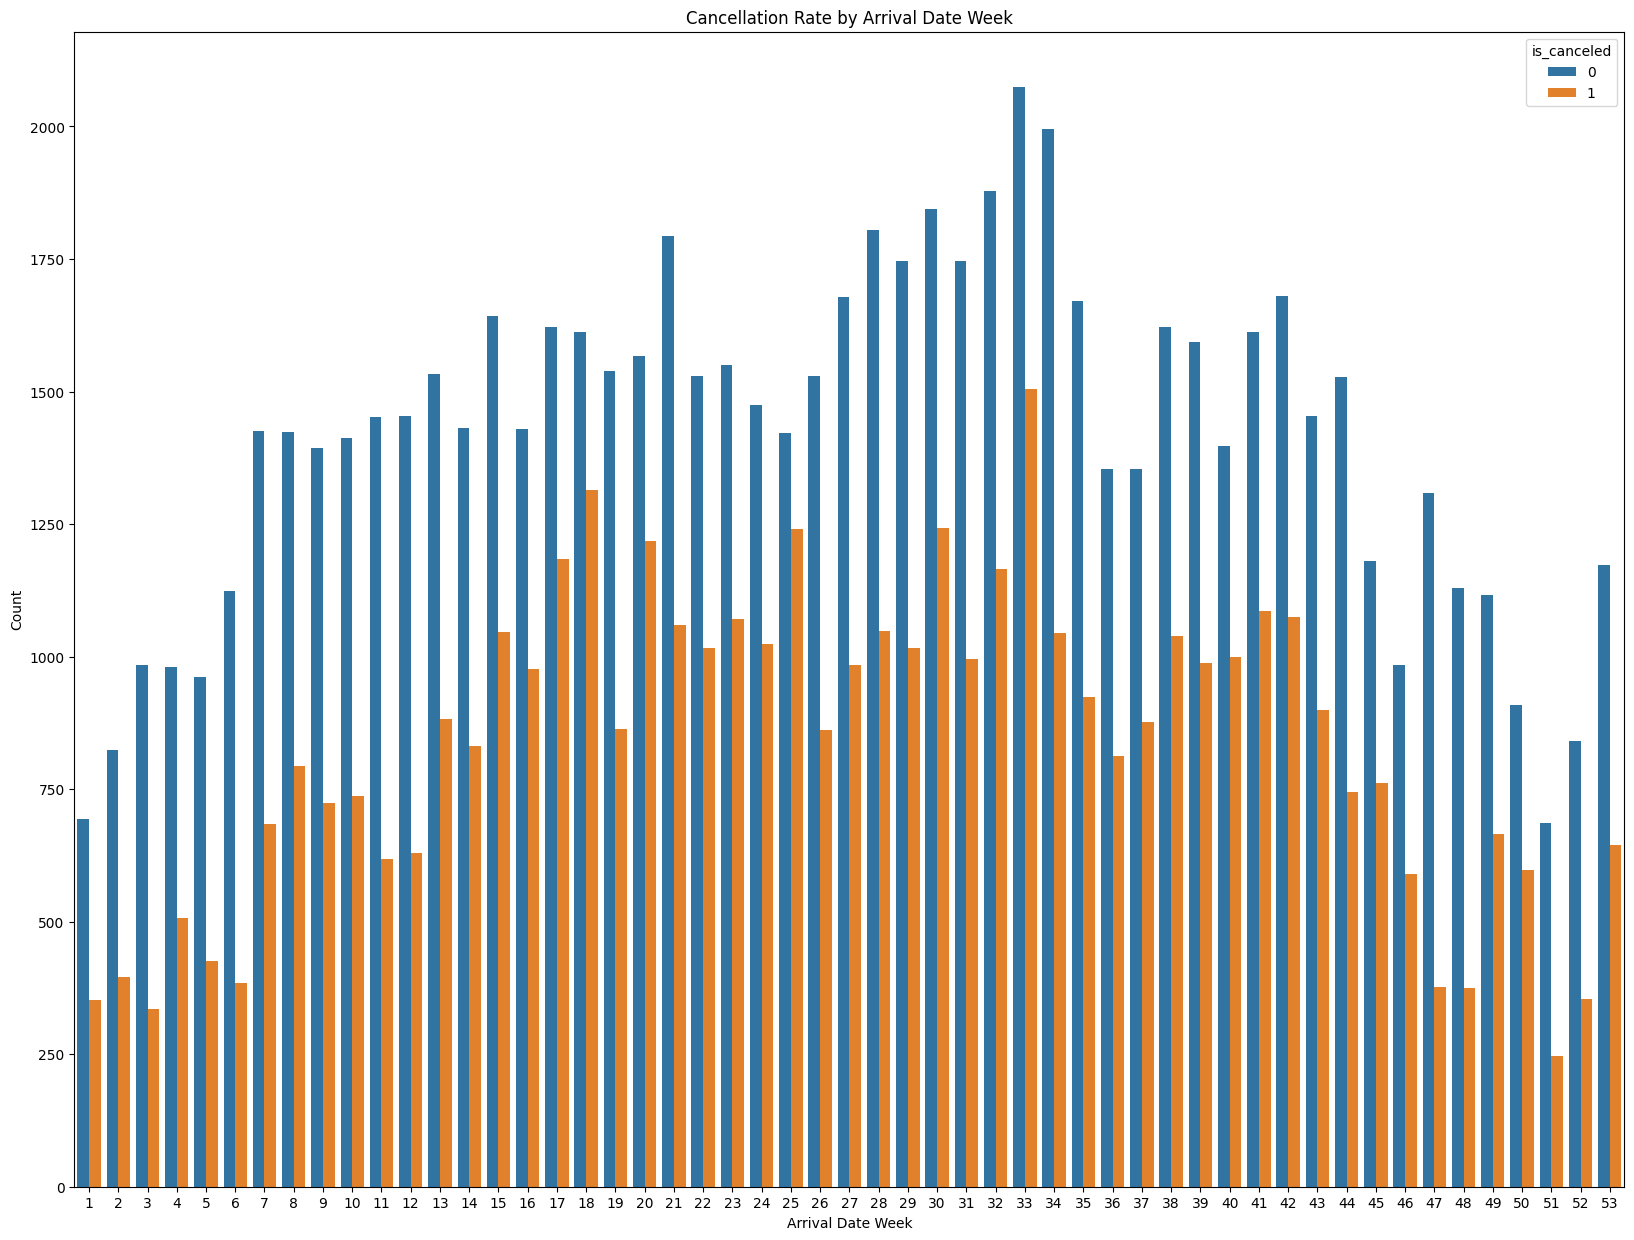

In [42]:
# prompt: chart aprival date week by cancelations

# 9. Cancellation Rate by Arrival Date Week
plt.figure(figsize=(20, 15))
sns.countplot(data=df, x='arrival_date_week_number', hue='is_canceled')
plt.title('Cancellation Rate by Arrival Date Week')
plt.xlabel('Arrival Date Week')
plt.ylabel('Count')
plt.show()


**Insights**
Mid-Year Peaks: There are noticeable peaks in the middle of the year, which could be due to holidays or vacation seasons.

Consistent Cancellation Pattern: While the number of bookings fluctuates, the proportion of cancellations remains relatively stable across weeks.

Seasonal Influence: The data indicates potential seasonal influences on booking behaviors and cancellation rates, which can be important for planning and forecasting.

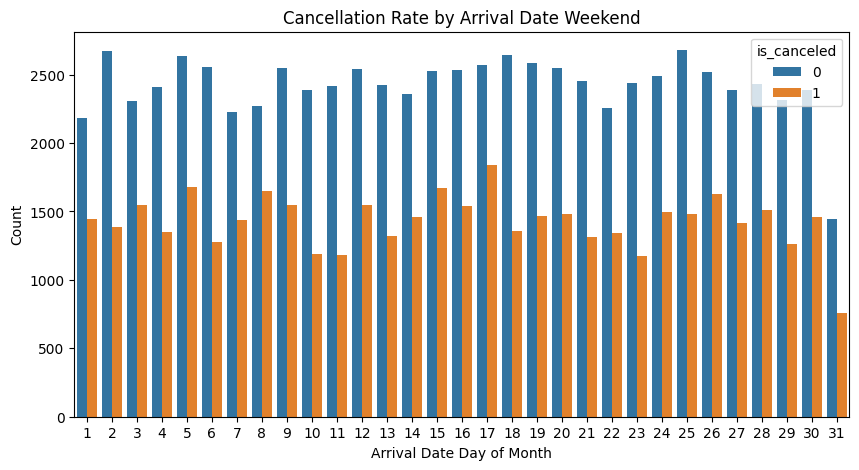

In [41]:
# prompt: chart avrival date weekend by cancellation

# Cancellation Rate by Arrival Date Weekend
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='arrival_date_day_of_month', hue='is_canceled')
plt.title('Cancellation Rate by Arrival Date Weekend')
plt.xlabel('Arrival Date Day of Month')
plt.ylabel('Count')
plt.show()


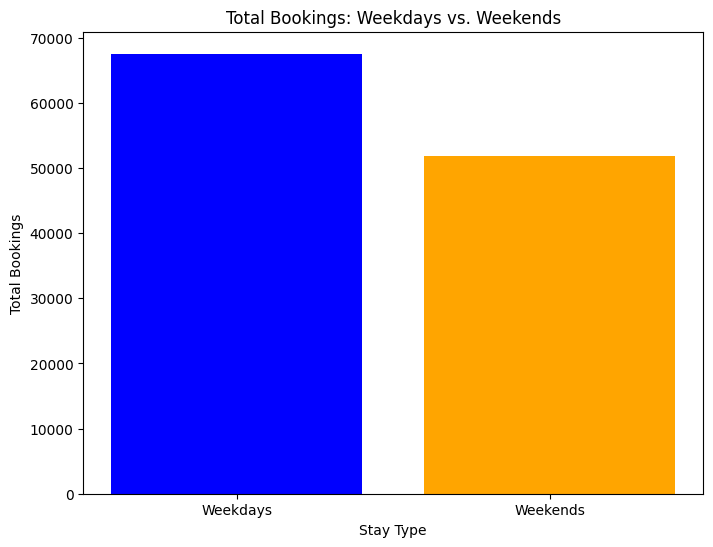

Weekday Bookings: 67563
Weekend Bookings: 51827


In [48]:
# prompt: compare week and weekend by bookings

# Create a complete arrival date column
df['arrival_date'] = pd.to_datetime(df['arrival_date_year'].astype(str) + '-' +
                                            df['arrival_date_month'].astype(str) + '-' +
                                            df['arrival_date_day_of_month'].astype(str),
                                            format='%Y-%B-%d')

# Extract the day of the week
df['day_of_week'] = df['arrival_date'].dt.day_name()

# Calculate total bookings for weekdays and weekends
weekdays_bookings = df[df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday'])].shape[0]
weekend_bookings = df[df['day_of_week'].isin(['Friday', 'Saturday', 'Sunday'])].shape[0]

# Create a bar plot for comparison
plt.figure(figsize=(8, 6))
plt.bar(['Weekdays', 'Weekends'], [weekdays_bookings, weekend_bookings], color=['blue', 'orange'])
plt.title('Total Bookings: Weekdays vs. Weekends')
plt.xlabel('Stay Type')
plt.ylabel('Total Bookings')
plt.show()

# Print the results
print("Weekday Bookings:", weekdays_bookings)
print("Weekend Bookings:", weekend_bookings)


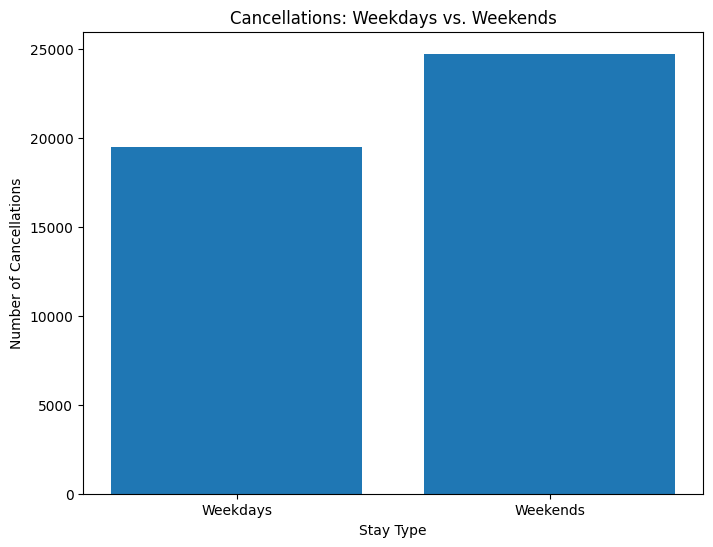

Weekday Cancellations: 19501
Weekend Cancellations: 24723


In [45]:
# prompt: compare weeek days and weekends by cancelatios

# Calculate cancellation counts for weekdays and weekends
weekday_cancellations = df[(df['stays_in_weekend_nights'] == 0) & (df['is_canceled'] == 1)].shape[0]
weekend_cancellations = df[(df['stays_in_weekend_nights'] > 0) & (df['is_canceled'] == 1)].shape[0]

# Create a bar plot for comparison
plt.figure(figsize=(8, 6))
plt.bar(['Weekdays', 'Weekends'], [weekday_cancellations, weekend_cancellations])
plt.title('Cancellations: Weekdays vs. Weekends')
plt.xlabel('Stay Type')
plt.ylabel('Number of Cancellations')
plt.show()

# Print the results
print("Weekday Cancellations:", weekday_cancellations)
print("Weekend Cancellations:", weekend_cancellations)


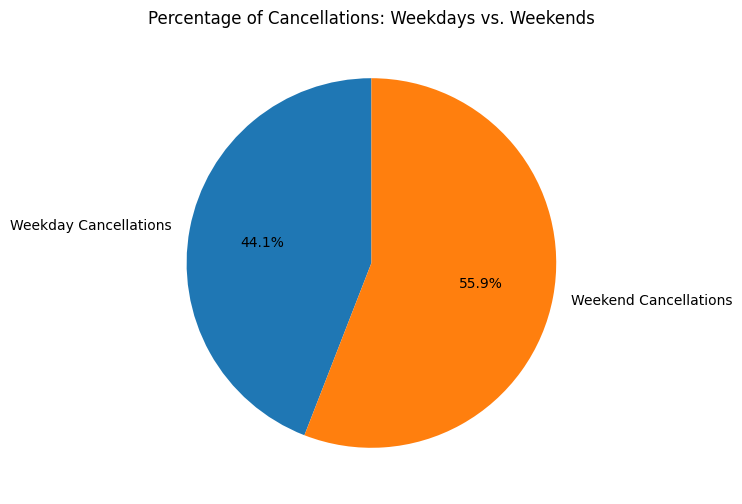

In [49]:
# prompt: pie chart to get the percentage of cancelations by week and weekend arival

# Calculate cancellation counts for weekdays and weekends
weekday_cancellations = df[(df['stays_in_weekend_nights'] == 0) & (df['is_canceled'] == 1)].shape[0]
weekend_cancellations = df[(df['stays_in_weekend_nights'] > 0) & (df['is_canceled'] == 1)].shape[0]

# Create labels and data for the pie chart
labels = ['Weekday Cancellations', 'Weekend Cancellations']
sizes = [weekday_cancellations, weekend_cancellations]

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Cancellations: Weekdays vs. Weekends')
plt.show()


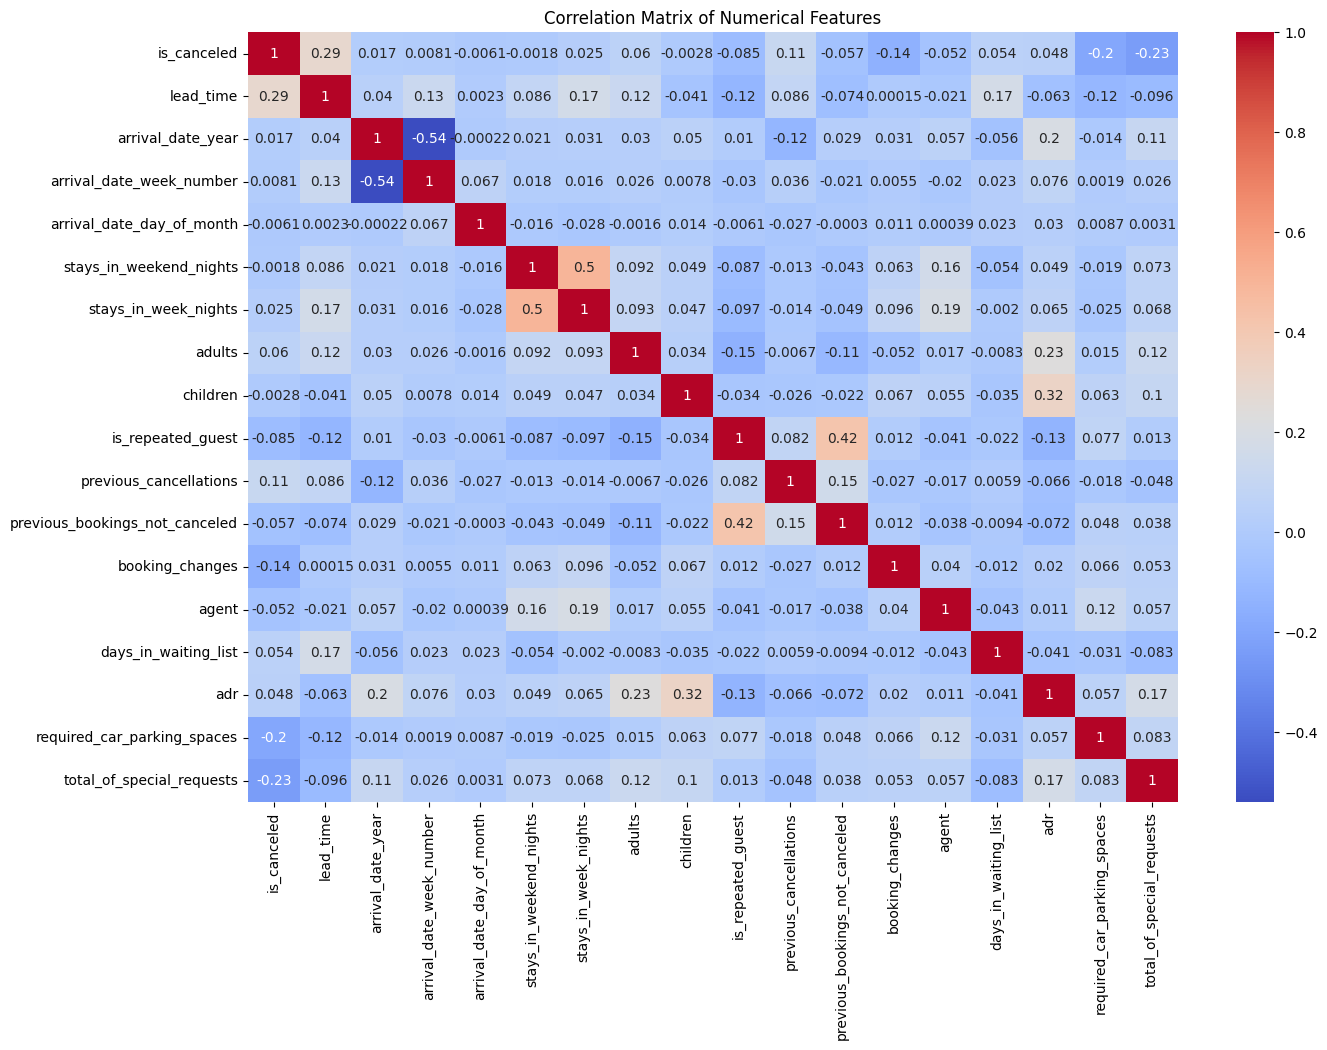

In [54]:
# prompt: corrleatio matrix with numerical features

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float', 'int']).columns

# Calculate correlation matrix
correlation_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


### feature engineering

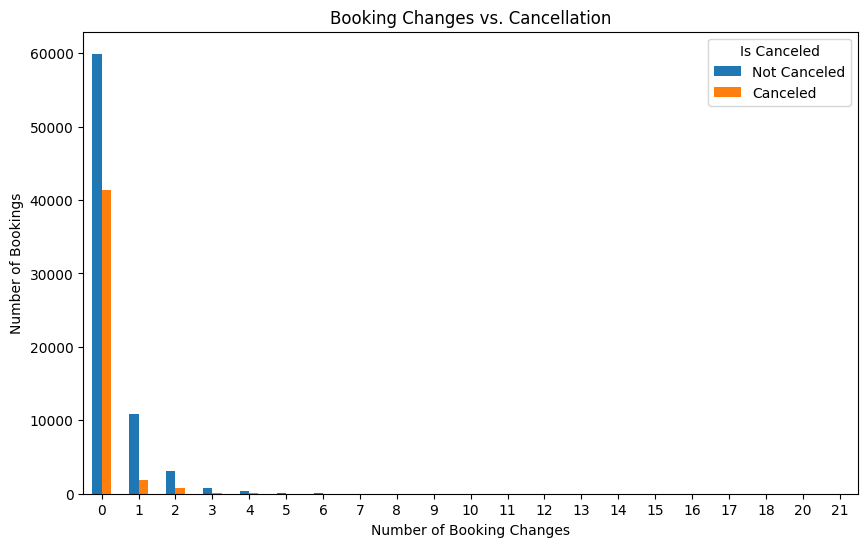

In [60]:
# prompt: bar chart on booking changes and is cancled

# Group the data by booking changes and cancellation status, and count the occurrences
booking_changes_cancel = df.groupby(['booking_changes', 'is_canceled'])['hotel'].count().unstack()

# Plot the bar chart
booking_changes_cancel.plot(kind='bar', figsize=(10, 6))
plt.title('Booking Changes vs. Cancellation')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()


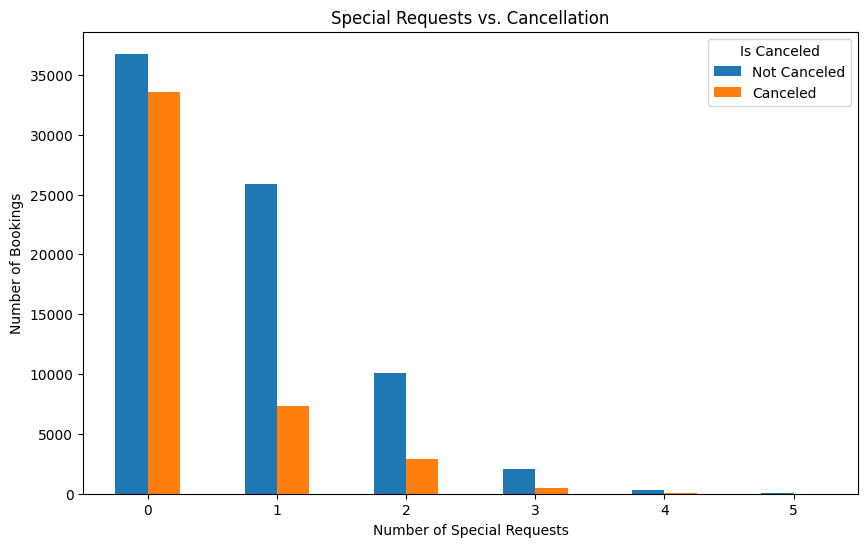

In [61]:
# prompt: bar chart on requast and cancelations

# Group the data by total of special requests and cancellation status, and count the occurrences
requests_cancel = df.groupby(['total_of_special_requests', 'is_canceled'])['hotel'].count().unstack()

# Plot the bar chart
requests_cancel.plot(kind='bar', figsize=(10, 6))
plt.title('Special Requests vs. Cancellation')
plt.xlabel('Number of Special Requests')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=0)
plt.legend(title='Is Canceled', labels=['Not Canceled', 'Canceled'])
plt.show()


In [62]:
# prompt: get the percent of customers who have childern

# Calculate the total number of customers
total_customers = df.shape[0]

# Calculate the number of customers with children
customers_with_children = df[df['children'] > 0].shape[0]

# Calculate the percentage of customers with children
percentage_customers_with_children = (customers_with_children / total_customers) * 100

print("Percentage of customers with children: {:.2f}%".format(percentage_customers_with_children))


Percentage of customers with children: 7.82%


In [65]:
# prompt: want to drop the following columns; 'arrival_date_year',
#     'arrival_date_week_number',
#     'arrival_date_day_of_month',
#     'stays_in_weekend_nights',
#     'stays_in_week_nights',
#     'adults',
#     'children',
#     'agent',
#     'days_in_waiting_list'

df = df.drop(['arrival_date_year',
    'arrival_date_week_number',
    'arrival_date_day_of_month',
    'stays_in_weekend_nights',
    'stays_in_week_nights',
    'adults',
    'children',
    'agent',
    'days_in_waiting_list'], axis=1)


In [66]:

hotel_df = df.copy()

In [67]:
# Split the data into training and testing sets before any preprocessing
X = hotel_df.drop(columns=['is_canceled'])
y = hotel_df['is_canceled']

In [68]:
print(X.shape)
print(y.shape)

(119390, 22)
(119390,)


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [71]:
# Identify categorical and boolean features
categorical_features = X_train.select_dtypes(include=['object']).columns
boolean_features = X_train.select_dtypes(include=['bool']).columns

In [74]:
# One-Hot Encoding for Categorical Features
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.linear_model import LogisticRegression

# Handle unknown categories during transformation
onehot_encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore') # Add handle_unknown='ignore'

onehot_encoded_train = onehot_encoder.fit_transform(X_train[categorical_features])
onehot_encoded_test = onehot_encoder.transform(X_test[categorical_features])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 7, 11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [75]:
# Convert OneHotEncoded features to DataFrame
onehot_encoded_train_df = pd.DataFrame(onehot_encoded_train, columns=onehot_encoder.get_feature_names_out(categorical_features))
onehot_encoded_test_df = pd.DataFrame(onehot_encoded_test, columns=onehot_encoder.get_feature_names_out(categorical_features))

In [76]:
# Binary Encoding for Boolean Features
X_train[boolean_features] = X_train[boolean_features].astype(int)
X_test[boolean_features] = X_test[boolean_features].astype(int)

In [77]:
# Combine OneHotEncoded features with the rest of the dataset
non_categorical_features_train = X_train.drop(columns=categorical_features)
non_categorical_features_test = X_test.drop(columns=categorical_features)

In [79]:
X_train_final = pd.concat([non_categorical_features_train.reset_index(drop=True), onehot_encoded_train_df.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([non_categorical_features_test.reset_index(drop=True), onehot_encoded_test_df.reset_index(drop=True)], axis=1)

In [82]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_month,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,...,booking_changes,deposit_type,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,arrival_date,day_of_week
0,Resort Hotel,0,342,July,BB,PRT,Direct,Direct,0,0,...,3,No Deposit,Transient,0.0,0,0,Check-Out,1/7/2015,2015-07-01,Wednesday
1,Resort Hotel,0,737,July,BB,PRT,Direct,Direct,0,0,...,4,No Deposit,Transient,0.0,0,0,Check-Out,1/7/2015,2015-07-01,Wednesday
2,Resort Hotel,0,7,July,BB,GBR,Direct,Direct,0,0,...,0,No Deposit,Transient,75.0,0,0,Check-Out,2/7/2015,2015-07-01,Wednesday
3,Resort Hotel,0,13,July,BB,GBR,Corporate,Corporate,0,0,...,0,No Deposit,Transient,75.0,0,0,Check-Out,2/7/2015,2015-07-01,Wednesday
4,Resort Hotel,0,14,July,BB,GBR,Online TA,TA/TO,0,0,...,0,No Deposit,Transient,98.0,0,1,Check-Out,3/7/2015,2015-07-01,Wednesday


In [83]:
# prompt: drop the dates

hotel_df = hotel_df.drop(['arrival_date', 'reservation_status_date'], axis=1)


In [88]:
# Ensure that 'arrival_date' and 'reservation_status_date' are NOT in X_train_final and X_test_final
X_train_final = X_train_final.drop(['arrival_date', 'reservation_status_date'], axis=1, errors='ignore')
X_test_final = X_test_final.drop(['arrival_date', 'reservation_status_date'], axis=1, errors='ignore')

# Now try scaling again
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_final)
X_test_scaled = scaler.transform(X_test_final)

In [89]:
# Train the logistic regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [91]:
# Make predictions
y_pred = logistic_model.predict(X_test_scaled)

In [93]:
# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)


In [94]:
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.0
Confusion Matrix:
[[14907     0]
 [    0  8971]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     14907
           1       1.00      1.00      1.00      8971

    accuracy                           1.00     23878
   macro avg       1.00      1.00      1.00     23878
weighted avg       1.00      1.00      1.00     23878



In [95]:
# Feature importance based on logistic regression coefficients
feature_importance = pd.Series(logistic_model.coef_[0], index=X_train_final.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance)

Feature Importance:
deposit_type_Non Refund          1.176905
lead_time                        0.660560
country_PRT                      0.635213
reservation_status_No-Show       0.430440
customer_type_Transient          0.297484
                                  ...    
country_DEU                     -0.232496
is_repeated_guest               -0.258550
assigned_room_type_D            -0.294135
total_of_special_requests       -0.650255
reservation_status_Check-Out   -15.403891
Length: 1157, dtype: float64


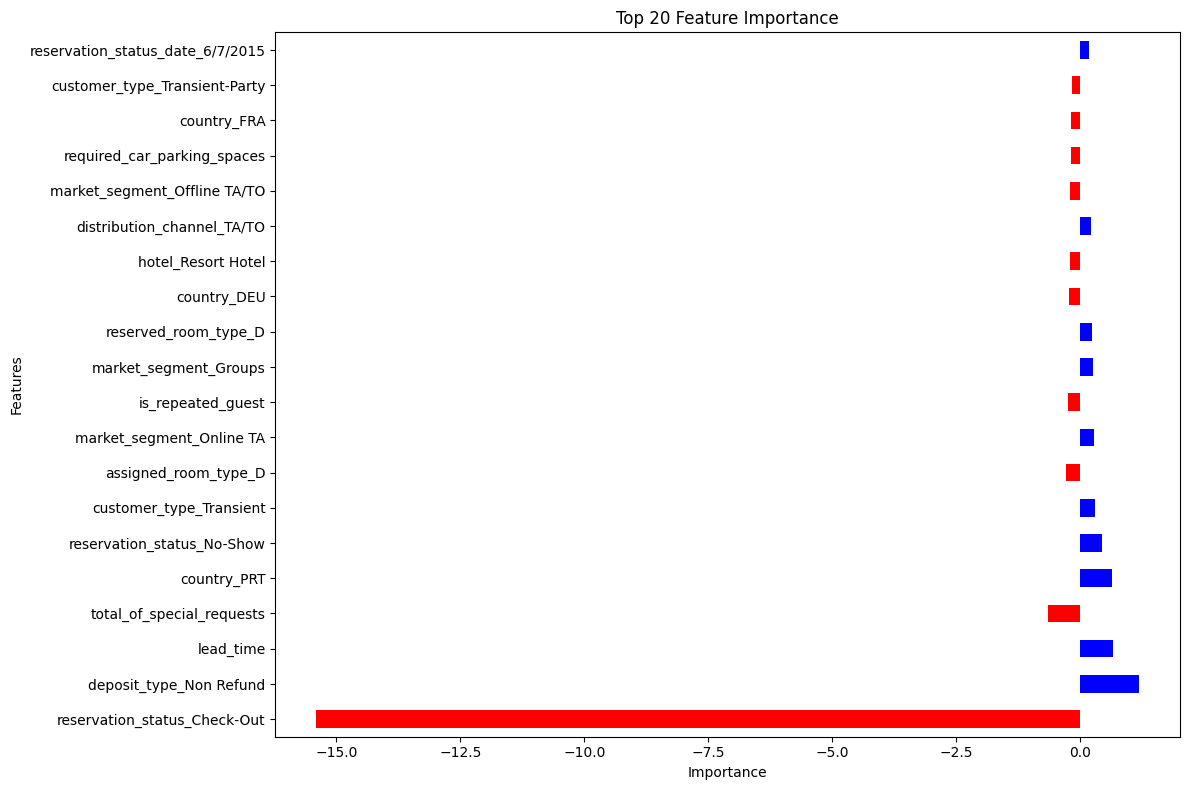

In [103]:
# Plot the top 20 features with both positive and negative values in a vertical bar chart
plt.figure(figsize=(12, 8))
top_20_features.plot(kind='barh', color=['red' if x < 0 else 'blue' for x in top_20_features])
plt.title('Top 20 Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

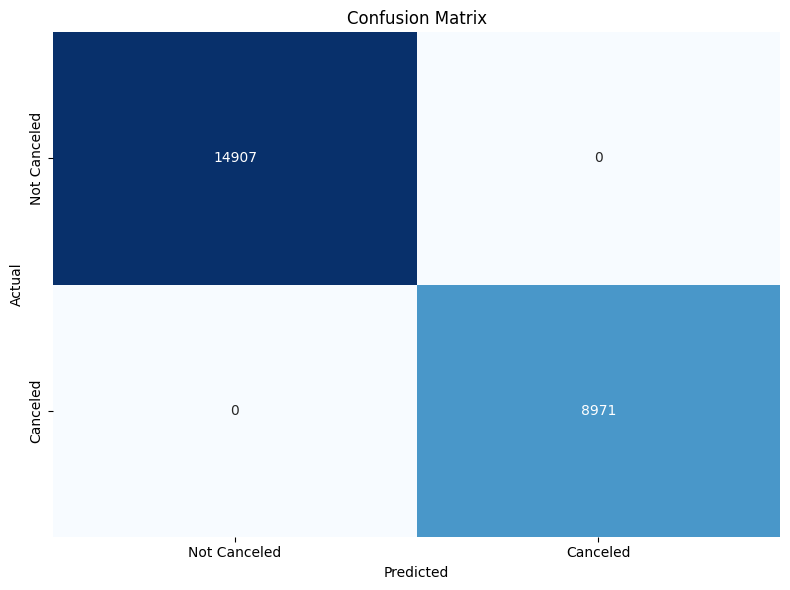

In [110]:

conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()











In [112]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(logistic_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

print(f"Cross-validation accuracy scores: {cv_scores}")
print(f"Mean cross-validation accuracy: {cv_scores.mean()}")

Cross-validation accuracy scores: [1. 1. 1. 1. 1.]
Mean cross-validation accuracy: 1.0


In [113]:
# Drop highly indicative features and re-evaluate the model
potential_leakage_features = ['reservation_status', 'deposit_type']

In [114]:
# Create a new dataset excluding potential leakage features
X_revised = X.drop(columns=potential_leakage_features)
X_train_revised, X_test_revised, y_train_revised, y_test_revised = train_test_split(X_revised, y, test_size=0.2, random_state=42)

In [118]:
 #One-Hot Encoding for Categorical Features
onehot_encoder = OneHotEncoder(sparse=False, drop='first', handle_unknown='ignore') # Handle unknown categories

# Remove 'deposit_type' and 'reservation_status' from categorical_features
categorical_features_revised = [f for f in categorical_features if f not in ['deposit_type', 'reservation_status']]

onehot_encoded_train_revised = onehot_encoder.fit_transform(X_train_revised[categorical_features_revised])
onehot_encoded_test_revised = onehot_encoder.transform(X_test_revised[categorical_features_revised])

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [3, 7, 9] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [121]:
# Convert OneHotEncoded features to DataFrame
# Convert OneHotEncoded features to DataFrame
onehot_encoded_train_revised_df = pd.DataFrame(onehot_encoded_train_revised, columns=onehot_encoder.get_feature_names_out(categorical_features_revised)) # Use pd.DataFrame and the revised categorical features
onehot_encoded_test_revised_df = pd.DataFrame(onehot_encoded_test_revised, columns=onehot_encoder.get_feature_names_out(categorical_features_revised)) # Use pd.DataFrame and the revised categorical features

In [122]:
# Binary Encoding for Boolean Features
X_train_revised[boolean_features] = X_train_revised[boolean_features].astype(int)
X_test_revised[boolean_features] = X_test_revised[boolean_features].astype(int)

In [124]:
# Combine OneHotEncoded features with the rest of the dataset
# 'categorical_features' contains columns already removed so we drop all columns in X_train_revised that are also in 'categorical_features_revised'
non_categorical_features_train_revised = X_train_revised.drop(columns=[col for col in categorical_features_revised if col in X_train_revised.columns])
non_categorical_features_test_revised = X_test_revised.drop(columns=[col for col in categorical_features_revised if col in X_test_revised.columns])

X_train_final_revised = pd.concat([non_categorical_features_train_revised.reset_index(drop=True), onehot_encoded_train_revised_df.reset_index(drop=True)], axis=1)
X_test_final_revised = pd.concat([non_categorical_features_test_revised.reset_index(drop=True), onehot_encoded_test_revised_df.reset_index(drop=True)], axis=1)

In [126]:
# Min-Max Scaling
scaler = MinMaxScaler()

# Identify DateTime columns
datetime_cols = X_train_final_revised.select_dtypes(include=['datetime64']).columns

# Drop DateTime columns
X_train_final_revised = X_train_final_revised.drop(columns=datetime_cols)
X_test_final_revised = X_test_final_revised.drop(columns=datetime_cols)

# Now apply scaling
X_train_scaled_revised = scaler.fit_transform(X_train_final_revised)
X_test_scaled_revised = scaler.transform(X_test_final_revised)

In [127]:
# Train the logistic regression model
logistic_model_revised = LogisticRegression(max_iter=1000)
logistic_model_revised.fit(X_train_scaled_revised, y_train_revised)


LogisticRegression(max_iter=1000)

In [128]:
# Make predictions
y_pred_revised = logistic_model_revised.predict(X_test_scaled_revised)


In [129]:
# Evaluation
accuracy_revised = accuracy_score(y_test_revised, y_pred_revised)
conf_matrix_revised = confusion_matrix(y_test_revised, y_pred_revised)
class_report_revised = classification_report(y_test_revised, y_pred_revised)

In [131]:
print(f"Accuracy: {accuracy_revised}")
print("Confusion Matrix:")
print(conf_matrix_revised)
print("Classification Report:")
print(class_report_revised)

Accuracy: 0.8502387134600888
Confusion Matrix:
[[13631  1276]
 [ 2300  6671]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.91      0.88     14907
           1       0.84      0.74      0.79      8971

    accuracy                           0.85     23878
   macro avg       0.85      0.83      0.84     23878
weighted avg       0.85      0.85      0.85     23878



In [134]:
# Cross-validation to evaluate the model performance with a subset of the data
subset_size = 5000
X_train_subset = X_train_scaled_revised[:subset_size]
y_train_subset = y_train_revised[:subset_size]

cv_scores_revised = cross_val_score(logistic_model_revised, X_train_subset, y_train_subset, cv=5, scoring='accuracy')
print(f"Cross-validation accuracy scores: {cv_scores_revised}")
print(f"Mean cross-validation accuracy: {cv_scores_revised.mean()}")

Cross-validation accuracy scores: [0.782 0.803 0.814 0.794 0.818]
Mean cross-validation accuracy: 0.8022


Feature Importance:
adr                                 14.676246
previous_cancellations              13.649661
lead_time                            5.441188
reserved_room_type_G                 3.185264
reservation_status_date_6/7/2015     3.079710
                                      ...    
assigned_room_type_I                -3.900257
reservation_status_date_1/9/2017    -4.157186
previous_bookings_not_canceled      -4.645348
booking_changes                     -6.070533
required_car_parking_spaces        -21.785546
Length: 1153, dtype: float64


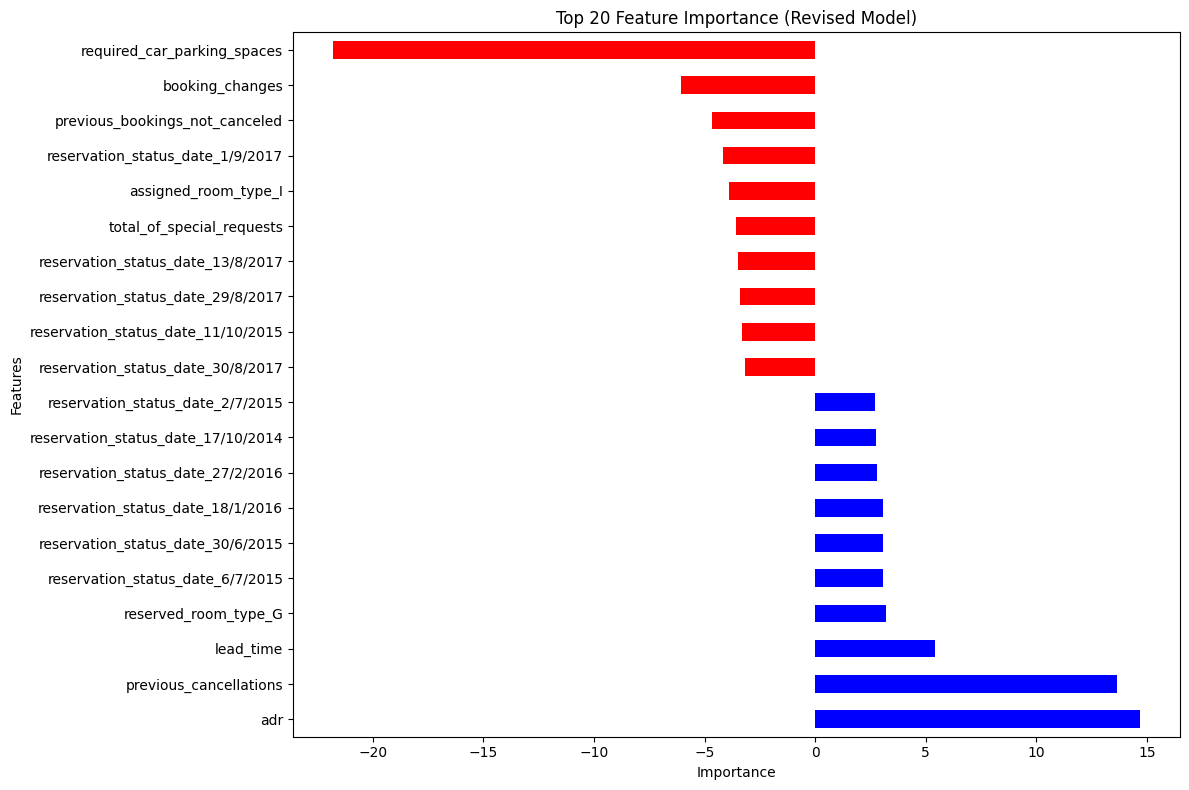

In [136]:
# Feature importance based on logistic regression coefficients
feature_importance_revised = pd.Series(logistic_model_revised.coef_[0], index=X_train_final_revised.columns).sort_values(ascending=False)
print("Feature Importance:")
print(feature_importance_revised)

# Plot the top 20 features with both positive and negative values in a vertical bar chart
top_20_features = pd.concat([feature_importance_revised.head(10), feature_importance_revised.tail(10)]) # Use pd.concat to combine the Series
plt.figure(figsize=(12, 8))
top_20_features.plot(kind='barh', color=['red' if x < 0 else 'blue' for x in top_20_features])
plt.title('Top 20 Feature Importance (Revised Model)')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.show()


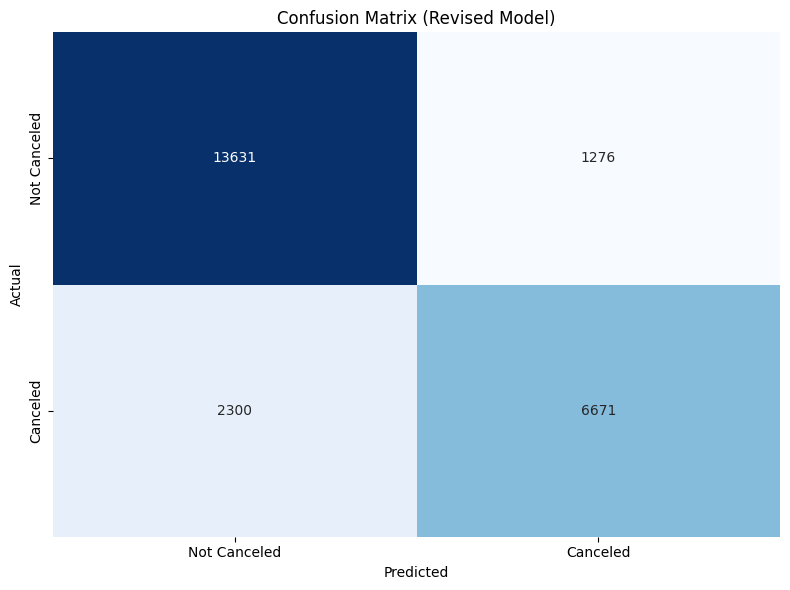

In [137]:
# prompt: want a confustion matrix chart

# Assuming y_test_revised and y_pred_revised are already defined from the previous code

# Calculate the confusion matrix
conf_matrix_revised = confusion_matrix(y_test_revised, y_pred_revised)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_revised, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Not Canceled', 'Canceled'], yticklabels=['Not Canceled', 'Canceled'])
plt.title('Confusion Matrix (Revised Model)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()


NameError: name 'df' is not defined